<a href="https://colab.research.google.com/github/MorSofer/Python/blob/main/titanicfSurvivorsHomeAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot  as plt
import plotly.express as px

#Imports for models and data processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.python.framework import ops

#Classifeirs for ML parts
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Imports to analyze calssifier results
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#Upload all the csv files
from google.colab import files

uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
#data loading
titanic_dtrain = pd.read_csv("../content/train.csv")
titanic_dtest = pd.read_csv("../content/test.csv")

#Prints first 10 rows to check and analyze the data
titanic_dtrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#checking for more missing or null vlaues:
titanic_dtrain.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_dtest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

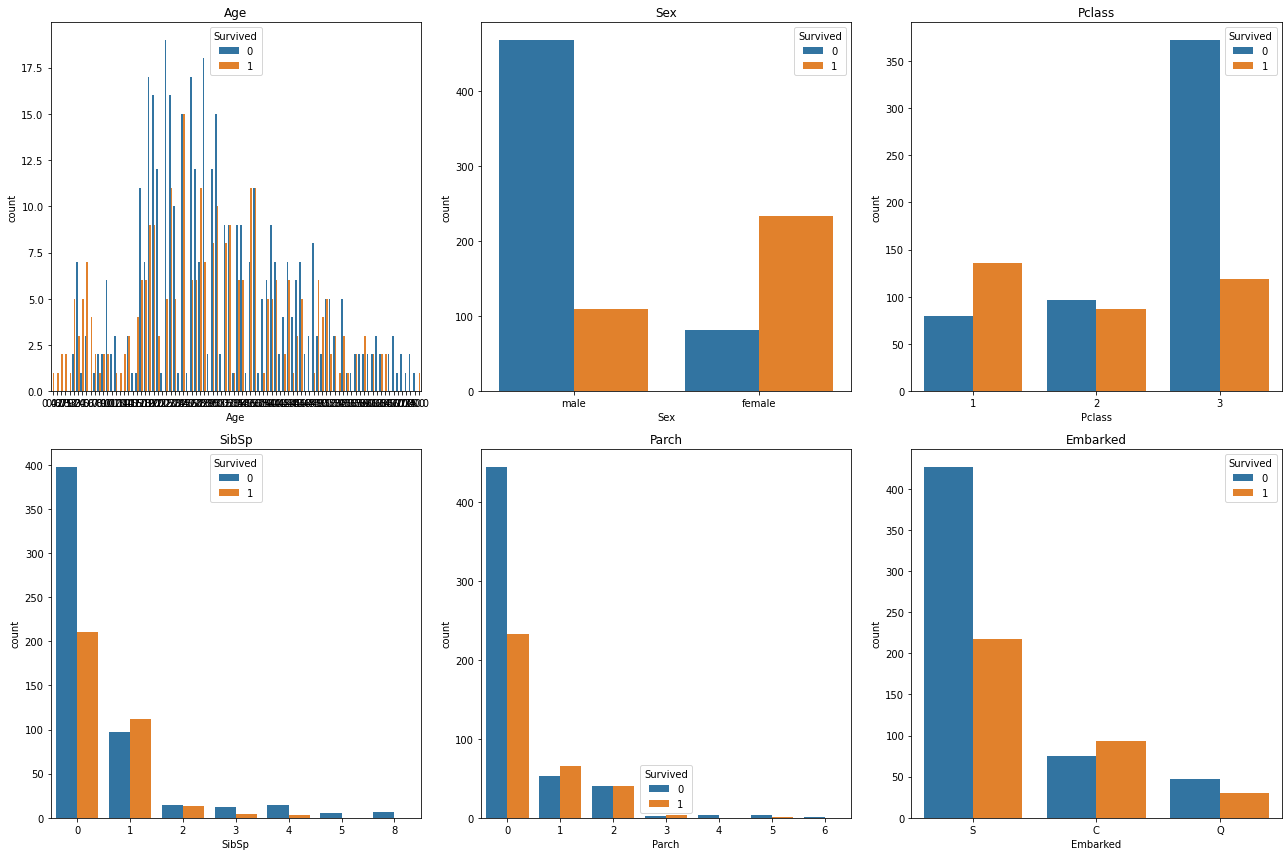

In [ ]:
#Visualze the count of survivors regard to columns:
#'sex', 'pclass', 'sibsp','parch', 'embarked' and 'age'
columns = ['Age','Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize =(num_cols*6,num_rows*6))
for r in range(0,num_rows):
  for c in range(0, num_cols):
    i = r*num_cols + c #index of the number of coulmns
    ax = axs[r][c] #show where to positonm the sub plots
    sns.countplot(titanic_dtrain[columns[i]], hue=titanic_dtrain['Survived'], ax=ax) #create the subplot of each column
    ax.set_title(columns[i]) #set the title as the name of the column

plt.tight_layout()

In [ ]:
#looking on survival rates by sex, class and their connection
print(titanic_dtrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print()
print(titanic_dtrain[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
print()
titanic_dtrain.pivot_table('Survived', index='Sex', columns='Pclass')



   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

      Sex  Survived
0  female  0.742038
1    male  0.188908



Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
#looking at survival rate by sex, age and class:
age = pd.cut(titanic_dtrain['Age'], [0,18,80])
titanic_dtrain.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



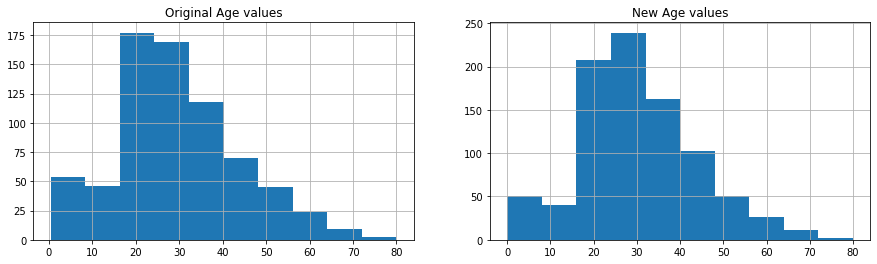

In [ ]:
#Filling Null values

#Fare
titanic_dtest["Fare"].fillna(titanic_dtest["Fare"].median(), inplace=True)

#Age
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title("Original Age values")
axis2.set_title("New Age values")

#average, std and null counter of train set
avg_age = titanic_dtrain["Age"].mean()
std_age = titanic_dtrain["Age"].std()
null_age = titanic_dtrain["Age"].isnull().sum()

#average, std, and null counter of test set
avg_age_test = titanic_dtest["Age"].mean()
std_age_test = titanic_dtest["Age"].std()
null_agae_test = titanic_dtest["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
train_random = np.random.randint(avg_age - std_age, avg_age + std_age, size = null_age)
test_random = np.random.randint(avg_age_test - std_age_test, avg_age_test + std_age_test, size = null_agae_test)

#plot original Age values
titanic_dtrain['Age'].hist(ax=axis1)

#Filling the null values and convert 
titanic_dtrain["Age"][np.isnan(titanic_dtrain["Age"])] = train_random
titanic_dtrain['Age'] = titanic_dtrain['Age']

titanic_dtest["Age"][np.isnan(titanic_dtest["Age"])] = test_random
titanic_dtest['Age'] = titanic_dtest['Age']
        
#plot new Age Values
titanic_dtrain['Age'].hist(ax=axis2)

#Note didn't filled embarked values because logically, Embarked doesn't seem to be useful in predictio
#if we want to consider it we can just put there 'S' bacuse of S is the most common value

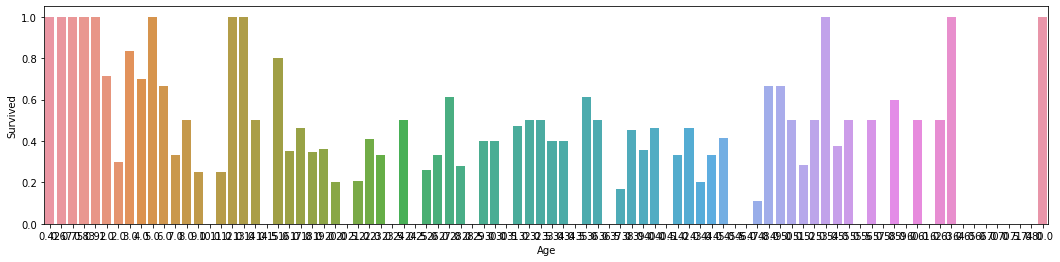

In [ ]:
#Survival rate by age with the new values
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_dtrain[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A v

[Text(0, 0, 'Family'), Text(0, 0, 'Alone')]

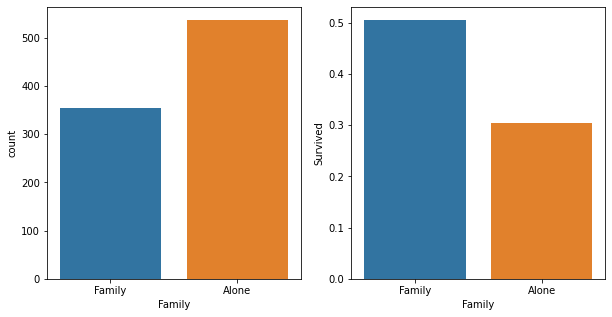

In [ ]:
#Survival rate for those who come with alone VS family
#There is  one column represent if the passenger had any family member aboard or not instead of using SibSp and Parch
titanic_dtrain['Family'] =  titanic_dtrain["Parch"] + titanic_dtrain["SibSp"]
titanic_dtrain['Family'].loc[titanic_dtrain['Family'] > 0] = 1
titanic_dtrain['Family'].loc[titanic_dtrain['Family'] == 0] = 0

titanic_dtest['Family'] =  titanic_dtest["Parch"] + titanic_dtest["SibSp"]
titanic_dtest['Family'].loc[titanic_dtest['Family'] > 0] = 1
titanic_dtest['Family'].loc[titanic_dtest['Family'] == 0] = 0

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family', data=titanic_dtrain, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_dtrain[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["Family","Alone"], rotation=0)

In [ ]:
#Survival by age, sex and parch 
fig = px.scatter_3d(titanic_dtrain, x= 'Parch', y='Sex', z='Age',color='Age')
fig.show()

In [ ]:
#Looking at all the values in each columns count them and see what we want to drop
for val in titanic_dtrain:
  print(titanic_dtrain[val].value_counts())
  print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Youseff, Mr. Gerious                        1
Humblen, Mr. Adolf Mathias Nicolai Olsen    1
Nakid, Mr. Sahid                            1
Wick, Miss. Mary Natalie                    1
Sunderland, Mr. Victor Francis              1
                                           ..
Carlsson, Mr. Frans Olof                    1
Keane, Mr. Andrew "Andy"                    1
Harrington, Mr. Charles H                   1
Becker, Miss. Marion Louise                 1
Barbara, Miss. Saiide                       1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88,

In [ ]:
#We see there missing values and some feature we don't really need for model training and analyze
#Droping embbarked because from what I see in the example in the git page there wasn't use in it and logacly it's shouldn't effect the prediction
titanic_dtrain = titanic_dtrain.drop(['PassengerId','Name','Ticket', 'Cabin', 'Embarked','SibSp','Parch'], axis=1)
titanic_dtest = titanic_dtest.drop(['Name','Ticket', 'Cabin', 'Embarked','SibSp','Parch'], axis=1)

In [ ]:
print(titanic_dtrain.shape)
print(titanic_dtrain.dtypes)
print()
print(titanic_dtest.shape)
print(titanic_dtest.dtypes)

(891, 6)
Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Family        int64
dtype: object

(418, 6)
PassengerId      int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Family           int64
dtype: object


In [ ]:
labelencoder = LabelEncoder()
#encode sex column
titanic_dtrain.iloc[:,2] = labelencoder.fit_transform(titanic_dtrain.iloc[:,2].values)
titanic_dtest.iloc[:,2] = labelencoder.fit_transform(titanic_dtest.iloc[:,2].values)

#encode the embarked - if we want to consider it
#titanic_dtrain.iloc[:,7] = labelencoder.fit_transform(titanic_dtrain.iloc[:,7].values)
#titanic_dtest.iloc[:,7] = labelencoder.fit_transform(titanic_dtrain.iloc[:,7].values)

In [ ]:
titanic_dtrain[titanic_dtrain.columns] = titanic_dtrain[titanic_dtrain.columns].apply(lambda x: x/x.max(), axis=0)
titanic_dtest[titanic_dtest.columns] = titanic_dtest[titanic_dtest.columns].apply(lambda x: x/x.max(), axis=0)

In [ ]:
titanic_dtrain = titanic_dtrain.dropna()
titanic_dtest = titanic_dtest.dropna()

Y = titanic_dtrain["Survived"]
X = titanic_dtrain.drop("Survived", axis=1)
X_test = titanic_dtest.iloc[:,1:6].values

X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=0)

In [ ]:
#For the API later
import joblib

model_columns = list(X_train.columns)
joblib.dump(model_columns, 'model_columns.pkl')
print("Models columns dumped!")

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
def models(X_train, Y_train):

  #Logistic regresion
  logr = LogisticRegression(random_state=0)
  logr.fit(X_train,Y_train)

  #KNN
  knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2)
  knn.fit(X_train,Y_train)
  
  #SVC linear
  svc_lin = SVC(kernel='linear', random_state=0)
  svc_lin.fit(X_train,Y_train)

  #SVC RBF
  svc_rbf = SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(X_train,Y_train)

  #GaussianNB
  gus = GaussianNB()
  gus.fit(X_train,Y_train)

  #Decision tree
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
  tree.fit(X_train,Y_train)
  
  #Random forest tree
  forest = RandomForestClassifier(n_estimators=3, criterion='entropy', random_state=0)
  forest.fit(X_train, Y_train)

  #check acc
  print('[0]Logistic Regression Training Acc', logr.score(X_train,Y_train))
  print('[1]KNN Training Acc', knn.score(X_train,Y_train))
  print('[2]svc linear Training Acc', svc_lin.score(X_train,Y_train))
  print('[3]svc rbf Training Acc', svc_rbf.score(X_train,Y_train))
  print('[4]gus Training Acc', gus.score(X_train,Y_train))
  print('[5]tree Training Acc', tree.score(X_train,Y_train))
  print('[6]forest Training Acc', forest.score(X_train,Y_train))

  return logr, knn, svc_lin, svc_rbf, gus, tree, forest


In [ ]:
#get and train all models
model = models(X_train,Y_train)

for i in range(len(model)):
  cm = confusion_matrix(Y_val,model[i].predict(X_val))
  #Extracting the True negative, False negative and True positive:
  TN, FP, FN, TP = confusion_matrix(Y_val, model[i].predict(X_val)).ravel()
  test_score = (TP + TN)/(TN + FP + FN + TP)

  print(cm)
  print('Model[{}] Testing acc = "{}"'.format(i, test_score))
  print()

[0]Logistic Regression Training Acc 0.7880910683012259
[1]KNN Training Acc 0.819614711033275
[2]svc linear Training Acc 0.7758318739054291
[3]svב rbf Training Acc 0.8161120840630472
[4]gus Training Acc 0.7670753064798599
[5]tree Training Acc 0.9877408056042032
[6]forest Training Acc 0.9439579684763573
[[66 13]
 [16 48]]
Model[0] Testing acc = "0.7972027972027972"

[[70  9]
 [23 41]]
Model[1] Testing acc = "0.7762237762237763"

[[68 11]
 [18 46]]
Model[2] Testing acc = "0.7972027972027972"

[[75  4]
 [24 40]]
Model[3] Testing acc = "0.8041958041958042"

[[61 18]
 [18 46]]
Model[4] Testing acc = "0.7482517482517482"

[[64 15]
 [14 50]]
Model[5] Testing acc = "0.7972027972027972"

[[65 14]
 [13 51]]
Model[6] Testing acc = "0.8111888111888111"



In [ ]:
#Get fearure importance
tree = model[5]
importances = pd.DataFrame({'feature': titanic_dtrain.iloc[:,1:8].columns, 'importance': np.round(tree.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Fare,0.338
Age,0.257
Sex,0.216
Pclass,0.160
Family,0.028


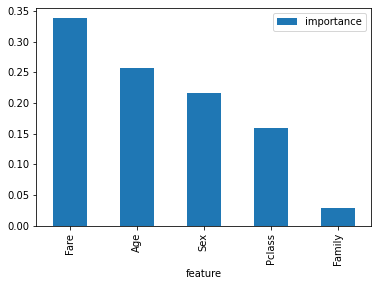

In [ ]:
#Visualize importance of each fearute
importances.plot.bar()

In [ ]:
#prediction of random forest
pred = model[5].predict(X_test)
print(pred)

my_survival = [[3,0,54,360,2]]

from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

pred = model[5].predict(my_survival_scaled)
print(pred)
if pred == 0:
  print("N")
else: print("Y")

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.

In [ ]:
import pickle
filename = 'tree_model.sav'
pickle.dump(model[5], open(filename, 'wb'))

In [ ]:
from time import time
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten

start = time()

model = Sequential()
model.add(Dense(32,input_shape=(X_train.shape[1],),kernel_regularizer='l2'))
model.add(Activation("relu"))

model.add(Dense(32, kernel_regularizer='l2'))
model.add(Activation("relu"))

model.add(Dense(16,kernel_regularizer='l2'))
model.add(Activation("relu"))

model.add(Dense(1,kernel_regularizer='l2'))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',optimizer ="Adam", metrics=['accuracy'])

model.summary()

Model: "sequential_161"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_582 (Dense)            (None, 32)                192       
_________________________________________________________________
activation_445 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_583 (Dense)            (None, 32)                1056      
_________________________________________________________________
activation_446 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_584 (Dense)            (None, 16)                528       
_________________________________________________________________
activation_447 (Activation)  (None, 16)                0         
_________________________________________________________________
dense_585 (Dense)            (None, 1)              

In [ ]:
history = model.fit(X_train,Y_train,epochs=54,batch_size=32,verbose=0, validation_data=(X_val, Y_val))
preds = model.evaluate(x=X_val, y=Y_val)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print ("Training Accuracy = " + str(history.history['accuracy'][-1]))

5/5 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.8042
Loss = 0.5492607355117798
Test Accuracy = 0.8041958212852478
Training Accuracy = 0.7810857892036438


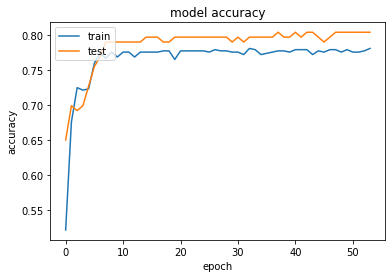

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

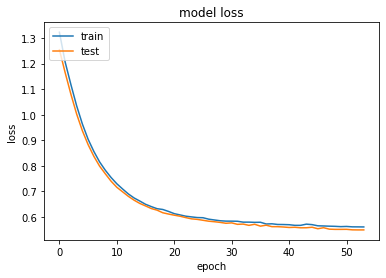

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('titanic.h5')